In [145]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython
import IPython.display as ipd
import soundfile as sf
from pydub import AudioSegment


%matplotlib inline

#NOTE
# bonafide filenames: DF_E_2000503 DF_E_2002152

In [126]:
#CONFIGURATIONS

#PATH for ffmpeg and related libraries, we use static build to avoid using sudo
%env PATH=$PATH:/home/jovyan/ffmpeg-git-20220302-amd64-static/
!echo $PATH

!pip install ffprobe


#INSTALL pydub, librosa..
#pydub is used for format conversion, it needs ffmpeg

env: PATH=$PATH:/home/jovyan/ffmpeg-git-20220302-amd64-static/
$PATH:/home/jovyan/ffmpeg-git-20220302-amd64-static/


In [167]:
def plot_and_play(filePath):
    """
    input: file path to the audio file. 
    For .wav format, filePath can be used as direct input to waveshow().
    This function plots the & displays the audio 
    We would need to force the HTML to be displayed as Audio() is used inside a function
    """
    data, sr = librosa.load(filePath, sr=None)
    ax = plt.figure(figsize=(14, 5))
    plt.axis((None,7,-1,1))

    librosa.display.waveshow(data, sr=sr)
    IPython.core.display.display(ipd.Audio(data=data,rate=sr)) #force the function to render the HTML

#
#SPOOFED FILES
#

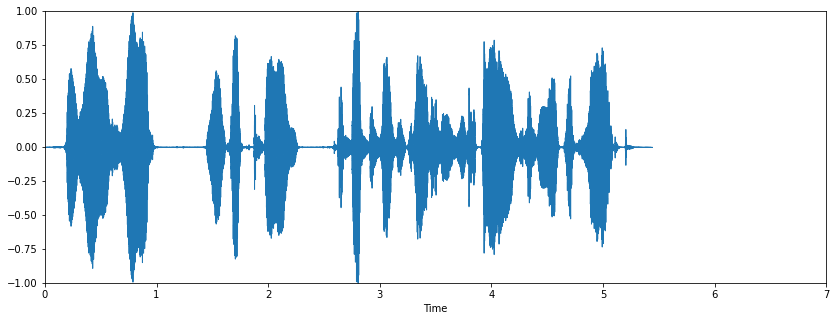

In [168]:
plot_and_play('./samples/DF_E_2001261.flac')

#
#BONAFIDE FILES
#

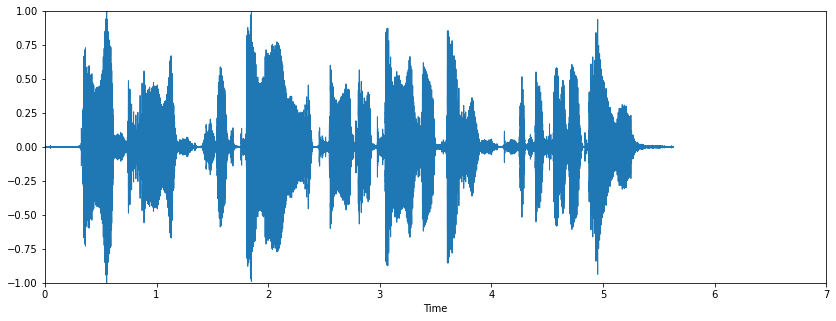

In [169]:
plot_and_play('./samples/DF_E_2002152.flac')

/opt/conda/envs/asv/lib/python3.7/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


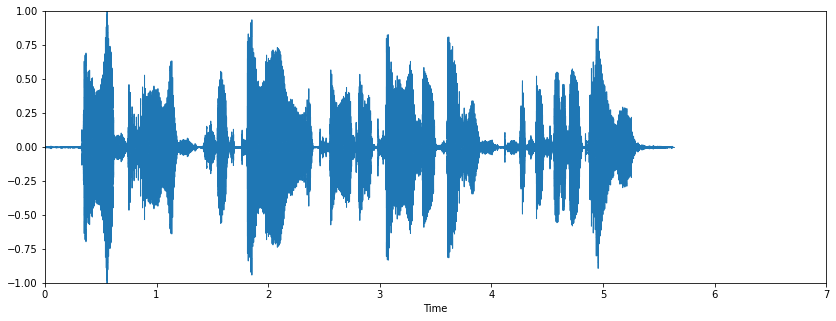

In [170]:
plot_and_play("./samples/test_DF_E_2002152.mp3")

***DEBUGGING***

In [134]:
from pydub import AudioSegment
sample = AudioSegment.from_file("./samples/DF_E_2002152.flac", format="flac")


# more complex export
file_handle = sample.export("./samples/test_DF_E_2002152.mp3",
                           format="mp3",
                           bitrate="192k",)
                           #tags={"album": "The Bends", "artist": "Radiohead"},
                           #cover="/path/to/albumcovers/radioheadthebends.jpg")

In [138]:
file_handle = sample.export("./samples/test_DF_E_2002152.ogg",
                           format="ogg",)
                           #bitrate="192k",)

In [ ]:
#flac files cannot be read this way. Provide data,sr instead
ipd.Audio("./samples/test_DF_E_2002152.mp3")
ipd.Audio("./samples/DF_E_2002152.flac")

In [152]:
sf.write("DF_E_2002152.flac", x_bona, sr, format="ogg")